In [1]:
import pandas as pd
from sklearn.impute  import  SimpleImputer
import numpy as np

In [2]:
data = pd.read_csv('ecom.csv')
data.head()

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores
0,72.98,1.0,59.0,0.0,B,4.26,2343.870,0
1,200.99,1.0,51.0,0.0,A,0.94,8539.872,0
2,69.98,1.0,79.0,0.0,C,4.29,1687.646,1
3,649.99,NaN,NaN,NaN,C,14.90,3498.846,0
4,83.59,NaN,NaN,NaN,C,21.13,3968.490,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29452 entries, 0 to 29451
Data columns (total 8 columns):
revenue                    29452 non-null float64
gender                     17723 non-null float64
age                        16716 non-null float64
engaged_last_30            17723 non-null float64
lifecycle                  29452 non-null object
 days_since_last_order     29452 non-null float64
previous_order_amount      29452 non-null float64
3rd_party_stores           29452 non-null int64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.8+ MB


In [4]:
data.isnull().sum()

revenue                        0
gender                     11729
age                        12736
engaged_last_30            11729
lifecycle                      0
 days_since_last_order         0
previous_order_amount          0
3rd_party_stores               0
dtype: int64

In [5]:
# 填充三个缺失值
# 填充性别
data['gender'] =data['gender'].fillna(axis=0,method='ffill')


In [6]:
# 年龄填充  使用应用模型预测规则
# 但是因为他是浮点型   不能用浮点型放入模型里面进行训练
nan_age = SimpleImputer(missing_values=np.nan,strategy='mean')


In [7]:
data.info()
print(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29452 entries, 0 to 29451
Data columns (total 8 columns):
revenue                    29452 non-null float64
gender                     29452 non-null float64
age                        16716 non-null float64
engaged_last_30            17723 non-null float64
lifecycle                  29452 non-null object
 days_since_last_order     29452 non-null float64
previous_order_amount      29452 non-null float64
3rd_party_stores           29452 non-null int64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.8+ MB
       revenue  gender   age  engaged_last_30 lifecycle  \
0        72.98     1.0  59.0              0.0         B   
1       200.99     1.0  51.0              0.0         A   
2        69.98     1.0  79.0              0.0         C   
3       649.99     1.0   NaN              NaN         C   
4        83.59     1.0   NaN              NaN         C   
5       319.99     1.0  80.0              0.0         C   
6       140.00     1

In [8]:
data_age = data['age']
data_age= np.array(data_age).reshape((len(data_age),1))
data_age_two = nan_age.fit_transform(data_age)

In [9]:
data['age'] = data_age_two

In [10]:
data.info()
print(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29452 entries, 0 to 29451
Data columns (total 8 columns):
revenue                    29452 non-null float64
gender                     29452 non-null float64
age                        29452 non-null float64
engaged_last_30            17723 non-null float64
lifecycle                  29452 non-null object
 days_since_last_order     29452 non-null float64
previous_order_amount      29452 non-null float64
3rd_party_stores           29452 non-null int64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.8+ MB
       revenue  gender        age  engaged_last_30 lifecycle  \
0        72.98     1.0  59.000000              0.0         B   
1       200.99     1.0  51.000000              0.0         A   
2        69.98     1.0  79.000000              0.0         C   
3       649.99     1.0  60.397404              NaN         C   
4        83.59     1.0  60.397404              NaN         C   
5       319.99     1.0  80.000000              0.

In [11]:
data['engaged_last_30'] = data.fillna({'engaged_last_30':0.0})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29452 entries, 0 to 29451
Data columns (total 8 columns):
revenue                    29452 non-null float64
gender                     29452 non-null float64
age                        29452 non-null float64
engaged_last_30            29452 non-null object
lifecycle                  29452 non-null object
 days_since_last_order     29452 non-null float64
previous_order_amount      29452 non-null float64
3rd_party_stores           29452 non-null int64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.8+ MB


In [12]:
# 数据处理完毕  缺失值全部填充 前面填充后面    年龄平均值    nan=0.0

In [13]:
data.describe()

,revenue,gender,age,days_since_last_order,previous_order_amount,3rd_party_stores
count,29452.000000,29452.000000,29452.000000,29452.000000,29452.000000,29452.000000
mean,398.288037,0.948730,60.397404,7.711348,2348.904830,2.286059
std,960.251728,0.220551,11.167091,6.489289,2379.774213,3.538219
min,0.020000,0.000000,18.000000,0.130000,0.000000,0.000000
25%,74.970000,1.000000,58.000000,2.190000,773.506250,0.000000
50%,175.980000,1.000000,60.397404,5.970000,1655.980000,0.000000
75%,499.990000,1.000000,62.000000,11.740000,3096.766500,3.000000
max,103466.100000,1.000000,99.000000,23.710000,11597.900000,10.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29452 entries, 0 to 29451
Data columns (total 8 columns):
revenue                    29452 non-null float64
gender                     29452 non-null float64
age                        29452 non-null float64
engaged_last_30            29452 non-null object
lifecycle                  29452 non-null object
 days_since_last_order     29452 non-null float64
previous_order_amount      29452 non-null float64
3rd_party_stores           29452 non-null int64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.8+ MB


In [15]:
# 处理哑变量矩阵
data = pd.get_dummies(data)
# data.corr()

In [16]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29452 entries, 0 to 29451
Columns: 9777 entries, revenue to lifecycle_C
dtypes: float64(5), int64(1), uint8(9771)
memory usage: 275.8 MB


,revenue,gender,age,days_since_last_order,previous_order_amount,3rd_party_stores,engaged_last_30_0.02,engaged_last_30_0.09,engaged_last_30_0.1,engaged_last_30_0.83,...,engaged_last_30_20588.97,engaged_last_30_21068.17,engaged_last_30_22214.92,engaged_last_30_23410.97,engaged_last_30_29080.8,engaged_last_30_62100.0,engaged_last_30_103466.1,lifecycle_A,lifecycle_B,lifecycle_C
0,72.98,1.0,59.000000,4.26,2343.870,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,200.99,1.0,51.000000,0.94,8539.872,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,69.98,1.0,79.000000,4.29,1687.646,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,649.99,1.0,60.397404,14.90,3498.846,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,83.59,1.0,60.397404,21.13,3968.490,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
# 哑变量矩阵处理完毕    数据预处理结束   进行要数据分析
# 回归分析

In [18]:
# data.corr()[['revenue']].sort_values('revenue',ascending= False)

In [22]:
# 进行过数据可视化  这样就可以看出来关系
import seaborn as  sns
import matplotlib.pyplot  as plt
%matplotlib inline

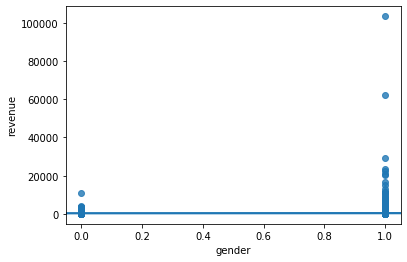

In [23]:
# gender和revenue关系
sns.regplot('gender','revenue',data)

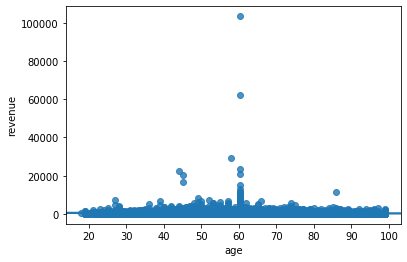

In [24]:
# age的关系
sns.regplot('age','revenue',data)

In [33]:
data.head()


,revenue,gender,age,days_since_last_order,previous_order_amount,3rd_party_stores,engaged_last_30_0.02,engaged_last_30_0.09,engaged_last_30_0.1,engaged_last_30_0.83,...,engaged_last_30_20588.97,engaged_last_30_21068.17,engaged_last_30_22214.92,engaged_last_30_23410.97,engaged_last_30_29080.8,engaged_last_30_62100.0,engaged_last_30_103466.1,lifecycle_A,lifecycle_B,lifecycle_C
0,72.98,1.0,59.000000,4.26,2343.870,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,200.99,1.0,51.000000,0.94,8539.872,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,69.98,1.0,79.000000,4.29,1687.646,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,649.99,1.0,60.397404,14.90,3498.846,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,83.59,1.0,60.397404,21.13,3968.490,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
# 进行线性回归分析   
from sklearn.linear_model import LinearRegression
model=LinearRegression()
# 设置自变量因变量    训练
y =data['revenue']
x= data[['age']]
x= data[['age','gender']]

In [35]:
model.coef_
#模型的截距
model.intercept_
#模型的评估,x为'local_tv','person','instore'
data=model.score(x,y)#x和y打分
predictions=model.predict(x)#计算y预测值
error=predictions-y#计算误差

rmse=(error**2).mean()**.5#计算rmse
mae=abs(error).mean()#计算mae

print(rmse)
print(mae)

AttributeError: 'LinearRegression' object has no attribute 'coef_'